<a href="https://colab.research.google.com/github/AlejandroPinto5/linear-models/blob/main/linear_regression_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Linear Regression With Trigonometric function sin(x)**

In [1]:
#Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rdm

In [2]:
#Defining x as random angles and y as sin(x)
x = np.array([i*np.pi/180 for i in range(10,360,3)])
np.random.seed(10)#setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x)) # This is the target

In [4]:
#Creating dataset
df = pd.DataFrame(np.column_stack([x, y]), columns = ['x', 'y'])

df.head()

,x,y
0,0.174533,0.373386
1,0.226893,0.332243
2,0.279253,0.043827
3,0.331613,0.324311
4,0.383972,0.467807


In [6]:
#Checking variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       117 non-null    float64
 1   y       117 non-null    float64
dtypes: float64(2)
memory usage: 2.0 KB


In [7]:
#Checking stats
df.describe()

,x,y
count,117.000000,117.000000
mean,3.211406,0.005921
std,1.775996,0.746312
min,0.174533,-1.315952
25%,1.692969,-0.641930
50%,3.211406,0.043827
75%,4.729842,0.677558
max,6.248279,1.339372


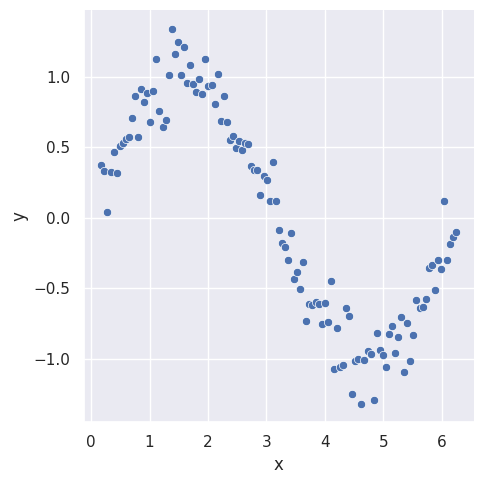

In [14]:
#Plotting data
sb.set()
sb.set_style('darkgrid')
sb.relplot(data = df,x = 'x', y = 'y')

In [15]:
#Polynomial regression with powers of x from 1 to 15. We can use this variables to predict
for i in range(2,16):
  colname = 'x_%d'%i
  df[colname] = df['x']**i
df.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,0.174533,0.373386,0.030462,0.005317,0.000928,0.000162,0.000028,0.000005,8.610313e-07,1.502783e-07,2.622851e-08,4.577739e-09,7.989662e-10,1.394459e-10,2.433790e-11,4.247765e-12
1,0.226893,0.332243,0.051480,0.011681,0.002650,0.000601,0.000136,0.000031,7.023697e-06,1.593626e-06,3.615823e-07,8.204043e-08,1.861438e-08,4.223469e-09,9.582748e-10,2.174257e-10
2,0.279253,0.043827,0.077982,0.021777,0.006081,0.001698,0.000474,0.000132,3.698101e-05,1.032705e-05,2.883856e-06,8.053244e-07,2.248890e-07,6.280085e-08,1.753731e-08,4.897340e-09
3,0.331613,0.324311,0.109967,0.036466,0.012093,0.004010,0.001330,0.000441,1.462338e-04,4.849296e-05,1.608088e-05,5.332620e-06,1.768364e-06,5.864117e-07,1.944615e-07,6.448586e-08
4,0.383972,0.467807,0.147435,0.056611,0.021737,0.008346,0.003205,0.001231,4.724984e-04,1.814264e-04,6.966273e-05,2.674857e-05,1.027071e-05,3.943671e-06,1.514261e-06,5.814344e-07


In [19]:
#Splitting data set into train and test set
df['randNumCol'] = np.random.randint(1, 6, df.shape[0])
train = df[df['randNumCol'] <= 3 ]
test = df[df['randNumCol'] > 3]
train = train.drop('randNumCol', axis = 1)
test = test.drop('randNumCol', axis = 1)

In [23]:
#Separating independent and dependent variables linear regression
from sklearn.linear_model import LinearRegression
x_train = train.drop('y', axis = 1).values
y_train = train['y'].values
x_test = test.drop('y', axis = 1).values
y_test = test['y'].values

Training Error 0.024627105424034495
Testing Error 0.023139037529448583


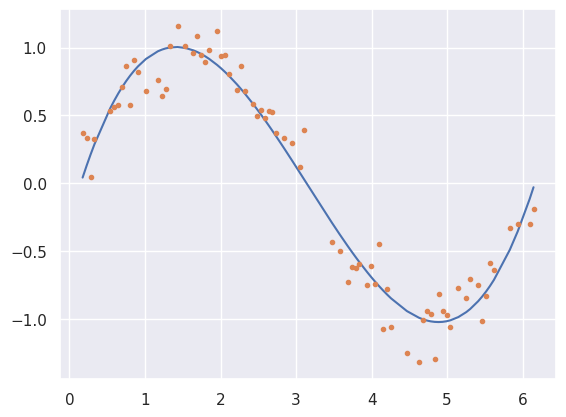

In [33]:
#Linear regression with 3 features
indep_var_train = x_train[:,0:3]

linreg = LinearRegression()
linreg.fit(indep_var_train, y_train)
y_train_pred = linreg.predict(indep_var_train)
rss_train = sum((y_train_pred - y_train)**2)/x_train.shape[0]

independent_variable_test = x_test[:,0:3]
y_test_pred = linreg.predict(independent_variable_test)
rss_test = sum((y_test_pred-y_test)**2)/ x_test.shape[0]

print("Training Error", rss_train)
print("Testing Error",rss_test)

plt.plot(x_train[:,0:1],y_train_pred)
plt.plot(x_train[:,0:1],y_train,'.')

In [45]:
# Importing ridge from sklearn's linear_model module
from sklearn.linear_model import Ridge
#Set the different values of alpha to be tested
alpha_ridge = [0, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20, 25]

In [50]:
# defining a function which will fit ridge regression model, plot the results, and return the coefficients
def ridge_regression(train_x, train_y, test_x, test_y, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(train_x,train_y)
    train_y_pred = ridgereg.predict(train_x)
    test_y_pred = ridgereg.predict(test_x)
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(train_x[:,0:1],train_y_pred)
        plt.plot(train_x[:,0:1],train_y,'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    mrss_train = sum((train_y_pred-train_y)**2)/train_x.shape[0]
    ret = [mrss_train]
    
    mrss_test = sum((test_y_pred-test_y)**2)/test_x.shape[0]
    ret.extend([mrss_test])
    
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    
    return ret

In [47]:
#Initialize the dataframe for storing coefficients.
col = ['mrss_train','mrss_test','intercept'] + ['coef_Var_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

In [48]:
#Define the alpha value for which a plot is required:
models_to_plot = {0:231, 1e-4:232, 1e-3:233, 1e-2:234, 1:235, 5:236}

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.44666e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.00168e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.19483e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.13599e-24): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Il

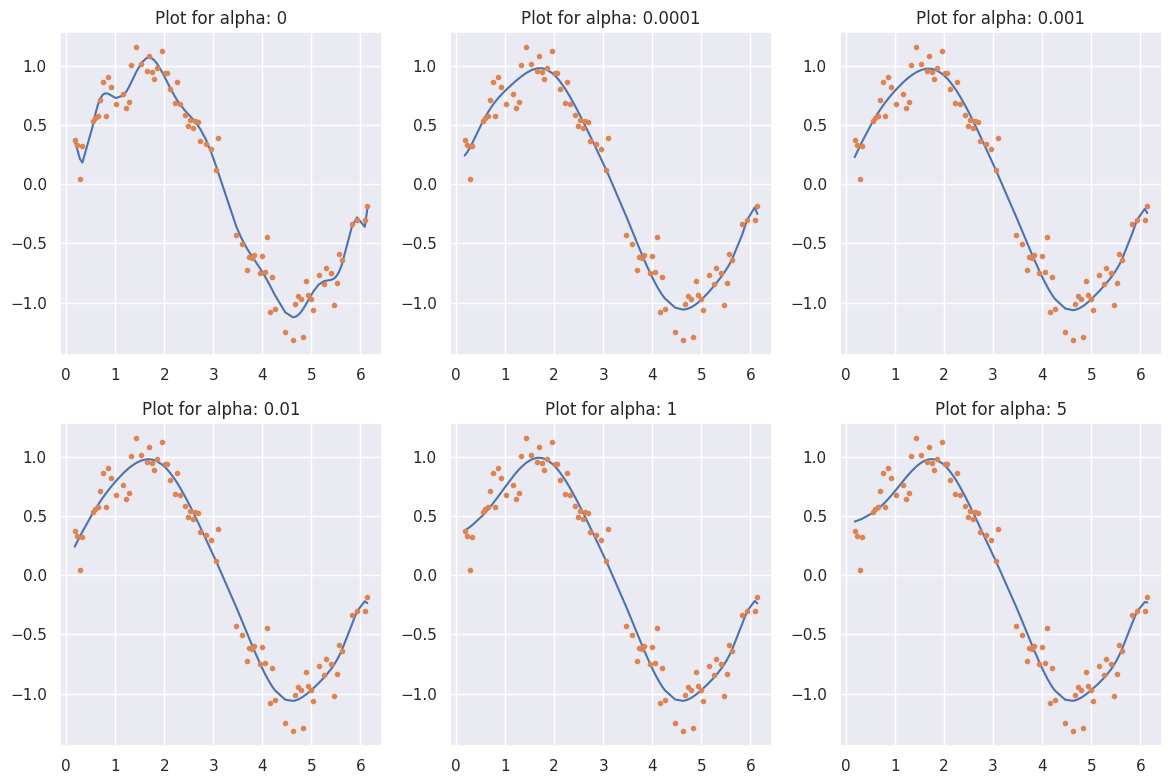

In [51]:
#Iterate over the 10 alpha values:
plt.figure(figsize=(12,8))
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(train_x, train_y, test_x, test_y, alpha_ridge[i], models_to_plot)

In [52]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,mrss_train,mrss_test,intercept,coef_Var_1,coef_Var_2,coef_Var_3,coef_Var_4,coef_Var_5,coef_Var_6,coef_Var_7,coef_Var_8,coef_Var_9,coef_Var_10,coef_Var_11,coef_Var_12,coef_Var_13,coef_Var_14,coef_Var_15
alpha_0,0.014,0.13,-2.2,48,-3.4e+02,1.2e+03,-2.4e+03,3.1e+03,-2.8e+03,1.7e+03,-7.6e+02,2.4e+02,-57,9.6,-1.1,0.09,-0.0042,8.9e-05
alpha_1e-08,0.015,0.051,2.4,-17,24,1.2e+02,-5e+02,8.7e+02,-9e+02,6.2e+02,-3e+02,1e+02,-25,4.3,-0.52,0.042,-0.002,4.3e-05
alpha_0.0001,0.018,0.039,0.26,-0.8,4.9,-5.4,-0.15,4,-1.5,-2.1,2.7,-1.5,0.48,-0.1,0.015,-0.0013,7.1e-05,-1.7e-06
alpha_0.001,0.018,0.033,0.084,0.77,0.51,-0.92,-0.013,0.69,-0.18,-0.45,0.45,-0.21,0.054,-0.0087,0.00082,-3.8e-05,2.7e-07,3e-08
alpha_0.01,0.018,0.03,0.099,0.79,0.17,-0.37,-0.15,0.31,0.16,-0.45,0.29,-0.08,0.0031,0.0043,-0.0013,0.00018,-1.3e-05,3.7e-07
alpha_1,0.019,0.032,0.34,0.19,0.16,0.088,0.017,-0.029,-0.036,-0.0071,0.016,0.0066,-0.011,0.0048,-0.0011,0.00014,-9.3e-06,2.7e-07
alpha_5,0.02,0.033,0.43,0.087,0.095,0.08,0.051,0.011,-0.029,-0.04,0.0042,0.04,-0.032,0.012,-0.0024,0.00028,-1.9e-05,5.2e-07
alpha_10,0.021,0.039,0.48,0.061,0.072,0.067,0.048,0.015,-0.021,-0.035,0.00037,0.034,-0.025,0.0085,-0.0017,0.00019,-1.2e-05,3.1e-07
alpha_20,0.023,0.067,0.52,0.04,0.05,0.048,0.036,0.014,-0.01,-0.019,-0.002,0.013,-0.0061,0.001,3.8e-06,-2.6e-05,3.3e-06,-1.4e-07
alpha_25,0.024,0.074,0.54,0.034,0.044,0.043,0.033,0.014,-0.0071,-0.016,-0.0038,0.01,-0.0032,-0.00018,0.00029,-6.3e-05,6e-06,-2.2e-07


In [53]:
coef_matrix_ridge['mrss_train']

alpha_0        0.014
alpha_1e-08    0.015
alpha_0.0001   0.018
alpha_0.001    0.018
alpha_0.01     0.018
alpha_1        0.019
alpha_5         0.02
alpha_10       0.021
alpha_20       0.023
alpha_25       0.024
Name: mrss_train, dtype: object

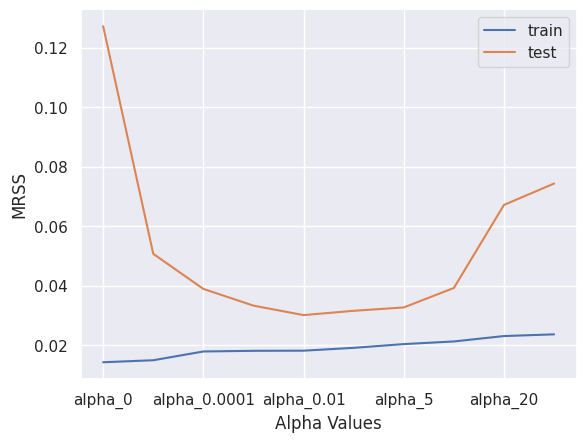

In [54]:
coef_matrix_ridge[['mrss_train','mrss_test']].plot()
plt.xlabel('Alpha Values')
plt.ylabel('MRSS')
plt.legend(['train', 'test'])